## Подключим библиотеки

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

**1. Загрузите данные о пассажирах Титаника из файла titanic.csv в DataFrame. Файл можно скачать по ссылке.**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/Data_Preprocessing/main/titanic_train.csv')

**2. Выведите на экран первые и последние 5 строк DataFrame.**

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


3. Получите общую информацию о DataFrame, включая количество строк и столбцов, типы данных и количество ненулевых значений.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin пропущено больше 50% - удалить столбец , также пропущены порт и возраст. Age вещественное!!!!

4. Выведите описательную статистику числовых столбцов.

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.shape

(891, 12)

5. Проверьте наличие пропущенных значений в каждом столбце и выведите результат.

In [8]:
import seaborn as sns

Text(0.5, 1.0, 'Missing values heatmap')

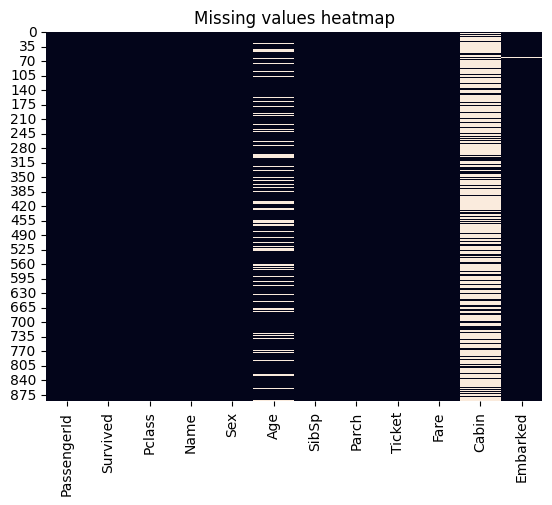

In [9]:
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

In [10]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


удалим Cabin

In [11]:
data=data.drop('Cabin', axis=1)
data.shape

(891, 11)

In [12]:
#data.drop('Cabin', axis=1).dropna() тут дропнули 2 порта

7. Заполните пропущенные значения в столбце Age средним возрастом.

In [13]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

<ipython-input-13-1981374165>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [14]:
data.fillna({'Age':data['Age'].mean()}, inplace=True)

In [15]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


8. Заполните пропущенные значения в столбце Embarked наиболее частым значением.

In [17]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-17-4247733614>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [18]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
data.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


 9. Сколько мужчин / женщин находилось на борту?

In [20]:
print("На борту было {} мужчин и {} женщин.".format(sum(data['Sex'] == 'male'),
                                            sum(data['Sex'] == 'female')))



На борту было 577 мужчин и 314 женщин.


In [21]:
data.Sex.value_counts()

,count
Sex,
male,577
female,314


In [22]:
data.groupby('Sex')['PassengerId'].count()

,PassengerId
Sex,
female,314
male,577


In [23]:
data.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
Sex,,,,,,,,,,
female,314,314,314,314,314,314,314,314,314,314
male,577,577,577,577,577,577,577,577,577,577


In [24]:
print(data[(data['Sex'] == 'male')].shape[0])

577


In [25]:
print(data[(data['Sex'] == 'female')].shape[0])

314


In [26]:
sex= data.groupby(['Sex'])
sex.size()

,0
Sex,
female,314
male,577


In [27]:
print(data.groupby('Sex')['Name'].agg(len))

Sex
female    314
male      577
Name: Name, dtype: int64


In [28]:

d=data[data.Sex=='male']
len(d)

577

In [29]:
def sex_category(sex):
  if sex == "male":
    return 1
  else:
    return 0
data_sex_category = [sex_category(sex) for sex in data.Sex]
print(f"На борту находилось: \
\n{data_sex_category.count(1)} мужчин \
\n{data_sex_category.count(0)} женщин.")

На борту находилось: 
577 мужчин 
314 женщин.


10. Вычислите количество выживших и погибших пассажиров.

In [30]:
survival_counts = data['Survived'].value_counts()
print(survival_counts)

Survived
0    549
1    342
Name: count, dtype: int64


11. Вычислите процент выживших пассажиров.

In [31]:
survival_rate = data['Survived'].mean() * 100
print(survival_rate)

38.38383838383838


12. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 99
- 108
- 112
- 125

In [ ]:
data[data['Sex'] == 'male']['Pclass'].value_counts()

,count
Pclass,
3,347
1,122
2,108


In [32]:
pd.crosstab(data['Pclass'], data['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [33]:
data[(data['Pclass'] == 2) & (data['Sex'] == 'male')].value_counts(['Pclass','Sex'])

,,count
Pclass,Sex,
2,male,108


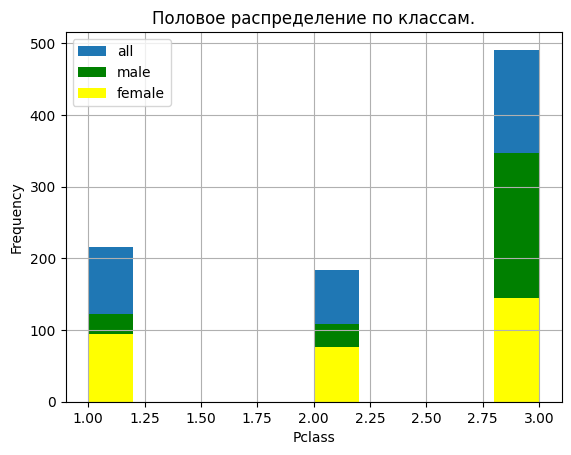

In [34]:
data['Pclass'].hist(label='all')
data[data['Sex'] == 'male']['Pclass'].hist(color="green",
                                           label='male')
data[data['Sex'] == 'female']['Pclass'].hist(color="yellow",
                                             label='female')
plt.title('Половое распределение по классам.')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.legend(loc='upper left')

In [35]:
print('Ответ: %d мужчин (2 класс)'\
%data[(data['Sex']=='male')&(data.Pclass==2)].shape[0])

Ответ: 108 мужчин (2 класс)


In [36]:
data[(data['Sex']=='male')&(data.Pclass==2)].shape

(108, 11)

In [37]:
groups = data.groupby;
print('По классам: {}'.format(*[groups('Pclass')['Name'].agg(len)]))
print('По классам (женщины): {}'.format(*[data[data['Sex']=='female'].groupby('Pclass')['Name'].agg(len)]))
print('По классам (мужчины): {}'.format(*[data[data['Sex']=='male'].groupby('Pclass')['Name'].agg(len)]))

По классам: Pclass
1    216
2    184
3    491
Name: Name, dtype: int64
По классам (женщины): Pclass
1     94
2     76
3    144
Name: Name, dtype: int64
По классам (мужчины): Pclass
1    122
2    108
3    347
Name: Name, dtype: int64


In [38]:
data[data['Pclass'] == 2]['Sex'].value_counts()

,count
Sex,
male,108
female,76


In [39]:
print(data.groupby(['Sex','Pclass'])['Pclass'].count())

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64


In [40]:
Class_group = pd.crosstab(data.Pclass, data.Sex, margins = True)# Ваш код здесь
print(Class_group)
print(f' {Class_group.loc[2,"male"]} мужчин было во 2-м классе.')

Sex     female  male  All
Pclass                   
1           94   122  216
2           76   108  184
3          144   347  491
All        314   577  891
 108 мужчин было во 2-м классе.


In [41]:
print(data.groupby(['Sex','Pclass'])['Name'].count())
print(data.groupby(['Pclass'])['Name'].count())

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Name, dtype: int64
Pclass
1    216
2    184
3    491
Name: Name, dtype: int64


In [42]:
data.groupby('Sex').Pclass.value_counts()



Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: count, dtype: int64

In [43]:
bool(0)

False

13. Вычислите средний возраст пассажиров для каждого класса (Pclass).

In [44]:
avg_age_per_class = data.groupby('Pclass')['Age'].mean()
print(avg_age_per_class)

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64


14. Найдите самый дорогой билет (Fare) и имя пассажира, который его купил.

In [45]:
max_fare = data['Fare'].max()
passenger_with_max_fare = data.loc[data['Fare'].idxmax()]['Name']
print(max_fare, passenger_with_max_fare)


512.3292 Ward, Miss. Anna


In [46]:
data.loc[data.Fare == data.Fare.max()][['Name','Fare']]

,Name,Fare
258,"Ward, Miss. Anna",512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292
737,"Lesurer, Mr. Gustave J",512.3292


 Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [47]:
print('median = ', round(data.Fare.median(), 2))

median =  14.45


In [48]:
print("Median fare: ", round(data['Fare'].median(), 2))
print("Fare std: ", round(data['Fare'].std(), 2))

Median fare:  14.45
Fare std:  49.69


In [49]:
print(
    "Медиана – {0}, стандартное отклонение – {1}".format(
        round(data['Fare'].median(), 2),
        round(data['Fare'].std(), 2)
    )

)

Медиана – 14.45, стандартное отклонение – 49.69


In [50]:
data_fare = data.sort_values(by = "Fare")
print(f"Медиана — {round(data_fare.Fare.median(),2)} \
\nСтандартное отклонение — {round(data_fare.Fare.std(),2)}.")

Медиана — 14.45 
Стандартное отклонение — 49.69.


In [51]:
print('Медиана {}, стандартное отклонение {}'.format(round(np.median(data['Fare']),2), round(np.std(data['Fare']),2)))

Медиана 14.45, стандартное отклонение 49.67


16. Вычислите среднюю стоимость билета для выживших и невыживших пассажиров.

In [52]:
avg_fare_per_survival = data.groupby('Survived')['Fare'].mean()
print(avg_fare_per_survival)


Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


17. Найдите отношение количества выживших мужчин к количеству выживших женщин.

In [53]:
survived_by_gender = data.groupby('Sex')['Survived'].sum()
male_to_female_survival_ratio = survived_by_gender['male'] / survived_by_gender['female']
print(male_to_female_survival_ratio)


0.4678111587982833


In [54]:
df1 = df.groupby('Sex')[['Survived']].sum()
ratio = df1.values[1] / df1.values[0]
print(("Отношение количества выживших мужчин к количеству выживших женщин = " + "{:.2%}"*len(ratio)).format(*ratio))

NameError: name 'df' is not defined

18. Вычислите процент выживших пассажиров для каждого порта посадки (Embarked)

In [55]:
survival_rate_per_embarked = data.groupby('Embarked')['Survived'].mean() * 100
print(survival_rate_per_embarked)


Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


19. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?
- 22.7% среди молодых и 40.6% среди старых
- **<font color='red'> 40.6% среди молодых и 19% среди старых, если не дроп 22 </font>
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [56]:
a = data[(data['Age'] <30)]
b = data[(data['Age'] >60)]
len(a)>len(b)

True

In [57]:
young_survived = data[data['Age'] < 30]['Survived']
young_survived.mean()*100

np.float64(37.076648841354725)

In [58]:
young = data[data['Age'] < 30]['Survived']
old = data[data['Age'] > 60]['Survived']

a = round(100 * young.mean(), 1)
b = round(100 * old.mean(), 1)

a,b

(np.float64(37.1), np.float64(22.7))

In [59]:
def survived_stats(data,cond):
  return round(len(data[(data['Survived']==1)&(cond)])/len(data[cond])*100,1)

s1=survived_stats(data,data['Age']<30)
s2=survived_stats(data,data['Age']>60)
print('Ответ: {}% среди молодых и {}% среди старых'.format(s1,s2))

Ответ: 37.1% среди молодых и 22.7% среди старых


In [60]:
print(round(data[(data['Age']<30) & (data['Survived'] == 1)].size/data[data['Age']<30].size*100,1))
print(round(data[(data['Age']>60) & (data['Survived'] == 1)].size/data[data['Age']>60].size*100,1))
#2 var
sur30 = data[data['Age'] < 30].groupby('Survived')['Name'].agg(len)
sur60 = data[data['Age'] > 60].groupby('Survived')['Name'].agg(len)

print('{}% среди молодых и {}% среди старых'.format(round(sur30[1]/sum(sur30)*100,1),round(sur60[1]/sum(sur60)*100,1)))

37.1
22.7
37.1% среди молодых и 22.7% среди старых


In [61]:
M=round(len(data[(data.Survived== 1)&(data.Age<30)])/len(data[data.Age<30])*100,1)
O=round(len(data[(data.Survived== 1)&(data.Age>60)])/len(data[data.Age>60])*100,1)
print(M,'% среди молодых и',O,'% среди старых')

37.1 % среди молодых и 22.7 % среди старых


In [62]:
age_surv = pd.crosstab(data.Age_category, data.Survived, margins = True)
age_surv['Perc_surv'] = (age_surv[1]*100/(age_surv[0]+age_surv[1])).round(1)
print(age_surv)
print()
print(f'{age_surv.loc[1,"Perc_surv"]}% среди молодых и {age_surv.loc[3,"Perc_surv"]}% среди старых')

AttributeError: 'DataFrame' object has no attribute 'Age_category'

20. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [63]:
a = data[(data['Sex'] =='male')]['Survived']
b = data[(data['Sex'] =='female')]['Survived']
print(len(a)>len(b))
a = round(100 * a.mean(), 1)
b = round(100 * b.mean(), 1)
a, b

True


(np.float64(18.9), np.float64(74.2))

In [64]:
male = data[data['Sex']=='male']['Survived']
female = data[data['Sex']=='female']['Survived']
male.mean()*100, female.mean()*100

(np.float64(18.890814558058924), np.float64(74.20382165605095))

In [65]:
female = data[data['Sex']=='female']
female['Survived'].value_counts(normalize=True)

,proportion
Survived,
1,0.742038
0,0.257962


In [66]:
j = data[data['Sex'] == 'female']['Survived']
m = data[data['Sex'] == 'male']['Survived']

a = round(100 * j.mean(), 1)
b = round(100 * m.mean(), 1)

print(
    "{0}% среди мужчин и {1}% среди женщин".format(
        b, a
    )
)

18.9% среди мужчин и 74.2% среди женщин


In [67]:
men_surv=data[data['Sex']=='male']['Survived']
fem_surv=data[data['Sex']=='female']['Survived']
print("Доли выживыших: \n\t среди женщин {}%, \n\t среди мужчин {}%".format(
round(100 * fem_surv.mean(), 1), round(100 * men_surv.mean(), 1)))

Доли выживыших: 
	 среди женщин 74.2%, 
	 среди мужчин 18.9%


In [68]:
s1=survived_stats(data,data['Sex']=='male')
s2=survived_stats(data,data['Sex']=='female')
print('Ответ: {}% среди мужчин и {}% среди женщин'\
.format(s1,s2))

Ответ: 18.9% среди мужчин и 74.2% среди женщин


21. Создайте новый столбец FamilySize, который будет содержать размер семьи (сумма значений столбцов SibSp и Parch).

In [69]:
data['FamilySize'] = data.apply(lambda row: row['SibSp'] + row['Parch'], axis=1)
print(data[['SibSp', 'Parch', 'FamilySize']].head())


   SibSp  Parch  FamilySize
0      1      0           1
1      1      0           1
2      0      0           0
3      1      0           1
4      0      0           0


22. Создайте новый столбец AgeGroup, который будет содержать возрастную группу пассажира: "Child" (до 18 лет), "Adult" (от 18 до 60 лет) и "Senior" (старше 60 лет).

In [70]:
def age_group(age):
    if age < 18:
        return 'Child'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

data['AgeGroup'] = data['Age'].apply(age_group)
print(data
 [['Age', 'AgeGroup']].head())


    Age AgeGroup
0  22.0    Adult
1  38.0    Adult
2  26.0    Adult
3  35.0    Adult
4  35.0    Adult


23. Определите, сколько пассажиров в каждой возрастной группе выжило и сколько погибло.

In [71]:
survival_by_age_group = data.groupby(['AgeGroup', 'Survived']).size().unstack()
print(survival_by_age_group)


Survived    0    1
AgeGroup          
Adult     480  276
Child      52   61
Senior     17    5


In [72]:
df5 = pd.crosstab(data['AgeGroup'], data['Survived'])
df5.head()

Survived,0,1
AgeGroup,,
Adult,480,276
Child,52,61
Senior,17,5


24. Найдите имя самого пожилого выжившего пассажира.

In [73]:
oldest_survivor = data[data['Survived'] == 1].sort_values(by='Age', ascending=False).iloc[0]['Name']
print(oldest_survivor)


Barkworth, Mr. Algernon Henry Wilson


In [74]:
data.loc[data.Age == data.Age.max()][['Name','Age']]

,Name,Age
630,"Barkworth, Mr. Algernon Henry Wilson",80.0


25. Найдите самое популярное имя среди пассажиров Титаника мужского пола?
- Charles
- Thomas
- William
- John

In [75]:
first_names = data[data['Sex'] == 'male']['Name'].apply(lambda full_name:
                full_name.split(',')[1].split()[1])
first_names.value_counts().head()


,count
Name,
William,35
John,25
George,14
Thomas,13
Charles,13


In [76]:
f='Hendekovic, Mr. Ignjac'
f

'Hendekovic, Mr. Ignjac'

In [77]:
t=f.split(',')
t

['Hendekovic', ' Mr. Ignjac']

In [78]:
t[0].split()

['Hendekovic']

In [79]:
t[1].split()


['Mr.', 'Ignjac']

In [80]:
t[1].split()[1]

'Ignjac'

In [81]:
import re

def clean_name(t,c,nn):
#t = first = name.str.extract(r"[Mrs\.\s+[^(]*\((\w+)", expand=False)
  t = re.sub(r'\.|\,|Mr|Master|Don[\W]*|\(|\)|\"| \S | \S$','',t)

  names = t.split()
  nn += names
  t = names

  return t

nn = []
for i in data[data['Sex']=='male']['Name'].values:
  clean_name(i,char,nn)

lst = pd.Series(nn)
print(lst.value_counts()[:10])
print('')
print(lst.value_counts()[:1].index[0])

NameError: name 'char' is not defined

In [82]:
first_names = data[data['Sex'] == 'male']['Name'].apply(lambda full_name:
                full_name.split(',')[1].split()[1])
first_names.value_counts().head()

,count
Name,
William,35
John,25
George,14
Thomas,13
Charles,13


In [83]:
def get_name(x):
  return x.split()[2]

v=data[(data['Sex'] == 'male')&(data['Name'])]
data['Short_name'] = data['Name'].apply(get_name)
data['Short_name'].value_counts().idxmax()


'William'

In [84]:
name=data[data['Sex']=='male']['Name'].str.split(', ').str[1]
names=np.array([el.split()[1] for el in name.values])
unique_names=np.unique(names,return_counts=True)
print('Ответ: самое популярное имя '+\
'среди пассажиров Титаника мужского пола - '+\
unique_names[0][unique_names[1].argmax()])

Ответ: самое популярное имя среди пассажиров Титаника мужского пола - William


In [85]:
first_names = data[data['Sex'] == 'male']['Name'].apply(lambda full_name:
full_name.split(',')[1].split()[1])
print("Cамое популярное имя среди пассажиров Титаника мужского пола {}".format(first_names.mode()[0]))

Cамое популярное имя среди пассажиров Титаника мужского пола William


26. Создайте новый столбец FareBin, который разбивает стоимость билета на 4 равных интервала.

In [86]:
data['FareBin'] = pd.cut(data['Fare'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
print(data[['Fare', 'FareBin']].head())


      Fare FareBin
0   7.2500     Low
1  71.2833     Low
2   7.9250     Low
3  53.1000     Low
4   8.0500     Low


27. Определите процент выживших пассажиров для каждой категории стоимости билета.

In [87]:
survival_rate_per_fare_bin = data.groupby('FareBin')['Survived'].mean() * 100
print(survival_rate_per_fare_bin)


FareBin
Low           36.811254
Medium        72.413793
High          66.666667
Very High    100.000000
Name: Survived, dtype: float64


<ipython-input-87-3785659413>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_per_fare_bin = data.groupby('FareBin')['Survived'].mean() * 100


In [88]:
df7 = pd.crosstab(data['FareBin'], data['Survived'], normalize=True)
df7

Survived,0,1
FareBin,,
Low,0.604938,0.352413
Medium,0.008979,0.023569
High,0.002245,0.004489
Very High,0.000000,0.003367


28. Определите количество выживших пассажиров для каждого порта посадки и класса

In [89]:
survival_count_per_embarked_class = data.groupby(['Embarked', 'Pclass'])['Survived'].sum().unstack()
print(survival_count_per_embarked_class)


Pclass     1   2   3
Embarked            
C         59   9  25
Q          1   2  27
S         76  76  67


In [90]:
df = data['Survived']
df9 = data.pivot_table(values='Survived', index='Embarked', columns='Pclass', aggfunc='sum')
df9.head()

Pclass,1,2,3
Embarked,,,
C,59,9,25
Q,1,2,27
S,76,76,67


** Дополнительно Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да
- Нет

гистограмма возраста у погибших почти полностью перекрывает гистограмму возраста выживших


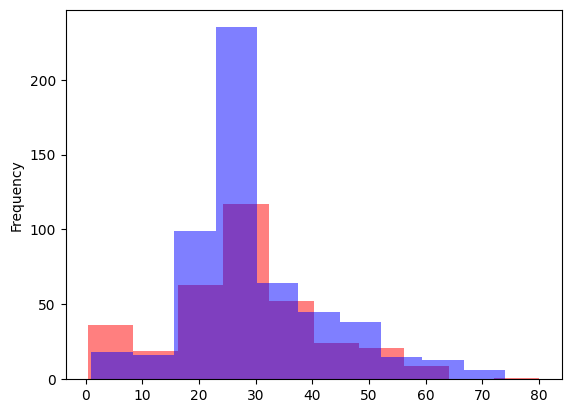

In [91]:
fig_pclass = data['Age'][data['Survived']==1].plot.hist(alpha=0.5, color = 'red')
fig_pclass = data['Age'][data['Survived']==0].plot.hist(alpha=0.5, color = 'blue')
print('гистограмма возраста у погибших почти полностью перекрывает гистограмму возраста выживших')

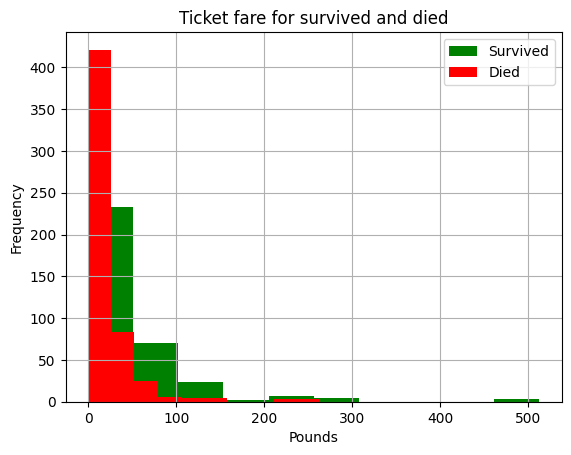

In [92]:
data[data['Survived'] == 1]['Fare'].hist(color="green",
                                         label='Survived')
data[data['Survived'] == 0]['Fare'].hist(color="red",
                                         label='Died')
plt.title('Ticket fare for survived and died')
plt.xlabel('Pounds')
plt.ylabel('Frequency')
plt.legend();


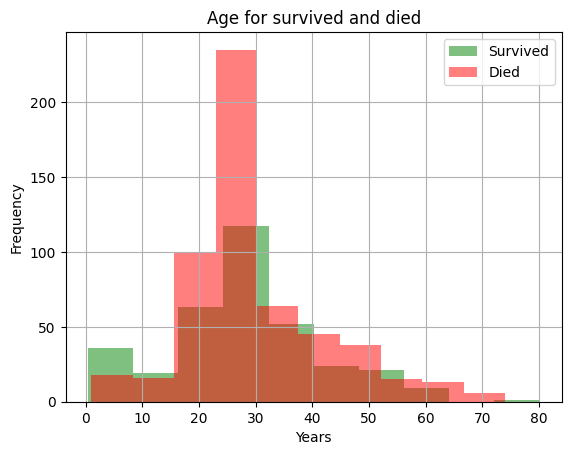

In [93]:
data[data['Survived'] == 1]['Age'].hist(color="green",
                                         label='Survived', alpha=.5)
data[data['Survived'] == 0]['Age'].hist(color="red",
                                         label='Died', alpha=.5)
plt.title('Age for survived and died')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend();

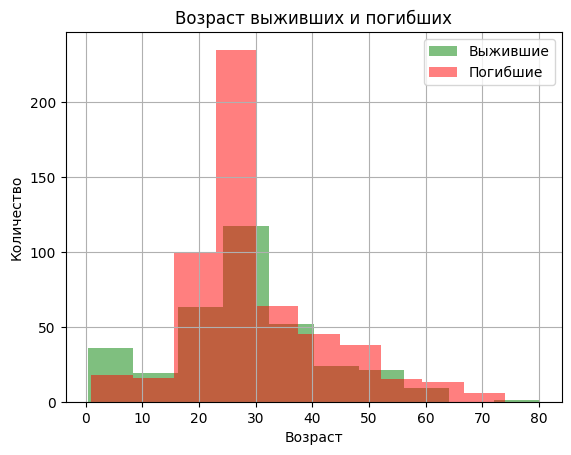

In [94]:
data[data['Survived'] == 1]['Age'].hist(color="green",label='Выжившие', alpha=.5)
data[data['Survived'] == 0]['Age'].hist(color="red",label='Погибшие', alpha=.5)
plt.title('Возраст выживших и погибших')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend();

In [95]:
import seaborn as sns

In [96]:
sns.boxplot(data['Survived'], data['Age'])

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

In [97]:
data.groupby('Survived')['Age'].mean()

,Age
Survived,
0,30.415100
1,28.549778


In [98]:
cond=data['Age'][data.Survived==1].mean()<\
data['Age'][data.Survived==0].mean()
print('Ответ: %s'%('да' if cond else 'нет'))

Ответ: да


In [99]:
forplop_s = data[data['Survived']==1][['Fare','Age']].sort_values('Age')
forplop_n = data[data['Survived']==0][['Fare','Age']].sort_values('Age')
med_s = forplop_s.median()

med_n = forplop_n.median()
print(med_s,med_n)

Fare    26.000000
Age     29.699118
dtype: float64 Fare    10.500000
Age     29.699118
dtype: float64


<ipython-input-100-937040246>:14: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ct = pd.crosstab(index = ds['R_Fare'], columns = ds['R_Age'], values = ds['R_Surv'], aggfunc = sum, normalize = True).sort_values(['R_Fare']).fillna(0)
<ipython-input-100-937040246>:16: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cn = pd.crosstab(index = dn['R_Fare'], columns = dn['R_Age'], values = dn['R_Surv'], aggfunc = sum, normalize = True).sort_values(['R_Fare']).fillna(0)


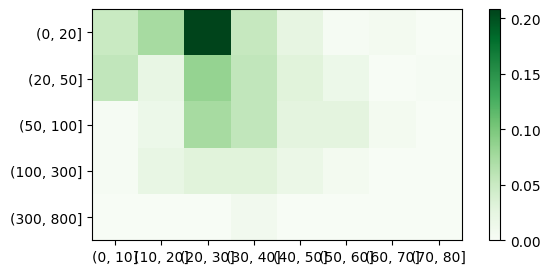

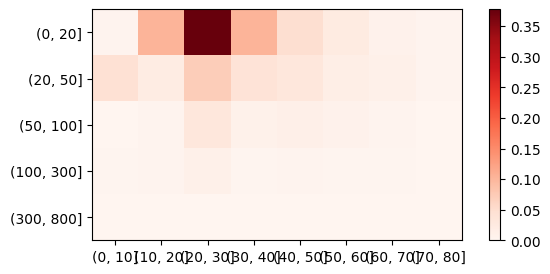

In [100]:
data_copy = data[['Survived','Fare','Age']].copy()
age_r = np.array([i for i in range(0,90,10)])
fare_r = np.array([0,20,50,100,300,800])
age_r
fare_r
data_copy['R_Age'] = pd.cut(data_copy['Age'],age_r)
data_copy['R_Fare'] = pd.cut(data_copy['Fare'],fare_r)
data_copy['R_Surv'] = 1
#data_copy['Survived'].apply(lambda x: x if x == 1 else -1)
data_copy.dropna(inplace = True)

ds = data_copy[data_copy['Survived']==1]
dn = data_copy[data_copy['Survived']==0]
ct = pd.crosstab(index = ds['R_Fare'], columns = ds['R_Age'], values = ds['R_Surv'], aggfunc = sum, normalize = True).sort_values(['R_Fare']).fillna(0)

cn = pd.crosstab(index = dn['R_Fare'], columns = dn['R_Age'], values = dn['R_Surv'], aggfunc = sum, normalize = True).sort_values(['R_Fare']).fillna(0)

#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15, 7))

plt.figure(figsize=(7, 3))
plt.imshow(ct, cmap='Greens')
plt.colorbar() # добавим шкалу интенсивности цвета

plt.xticks(range(len(ct.columns)), ct.columns)
plt.yticks(range(len(ct)), ct.index);

plt.show()

plt.figure(figsize=(7, 3))
plt.imshow(cn, cmap='Reds')
plt.colorbar() # добавим шкалу интенсивности цвета

plt.xticks(range(len(cn.columns)), cn.columns)
plt.yticks(range(len(cn)), cn.index);


plt.show()

In [101]:
raspr1 = data.groupby('Survived')['Age','Fare'].mean()
raspr1.index = ['Погибшие','Выжившие']
print(raspr1)
raspr1.plot.bar()
plt.legend(labels = ['Средний возраст','Средння стоимость'])

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

**29. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [102]:
for cl in data['Pclass'].unique():
    for sex in data['Sex'].unique():
        print("Average age for {0} and class {1}: {2}".format(sex, cl,
            round(data[(data['Sex'] == sex)
                         & (data['Pclass'] == cl)]['Age'].mean(),2)))


Average age for male and class 3: 27.37
Average age for female and class 3: 24.07
Average age for male and class 1: 39.29
Average age for female and class 1: 34.14
Average age for male and class 2: 30.65
Average age for female and class 2: 28.75


In [103]:
pd.crosstab(data['Pclass'], data['Sex'],
            values=data['Age'], aggfunc=np.mean)

<ipython-input-103-1600690626>:1: FutureWarning: The provided callable <function mean at 0x7cc9ae3de340> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(data['Pclass'], data['Sex'],


Sex,female,male
Pclass,,
1,34.141405,39.287717
2,28.748661,30.653908
3,24.068493,27.372153


In [104]:
pd.crosstab(data['Pclass'], data['Sex'],
            values=data['Age'], aggfunc=np.mean)

<ipython-input-104-1600690626>:1: FutureWarning: The provided callable <function mean at 0x7cc9ae3de340> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(data['Pclass'], data['Sex'],


Sex,female,male
Pclass,,
1,34.141405,39.287717
2,28.748661,30.653908
3,24.068493,27.372153
